In [1]:
import pandas as pd

In [2]:
df_listings = pd.read_csv('listings.csv')

In [3]:
#check number of columns and rows
df_listings.shape

(20420, 74)

In [4]:
#check types of columns
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
#check number of missing values in every column
df_listings.isnull().sum()
print(df_listings.isnull().sum())

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               1
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4374
Length: 74, dtype: int64


In [6]:
!pip install missingno

In [7]:
!pip install quilt

<AxesSubplot:>

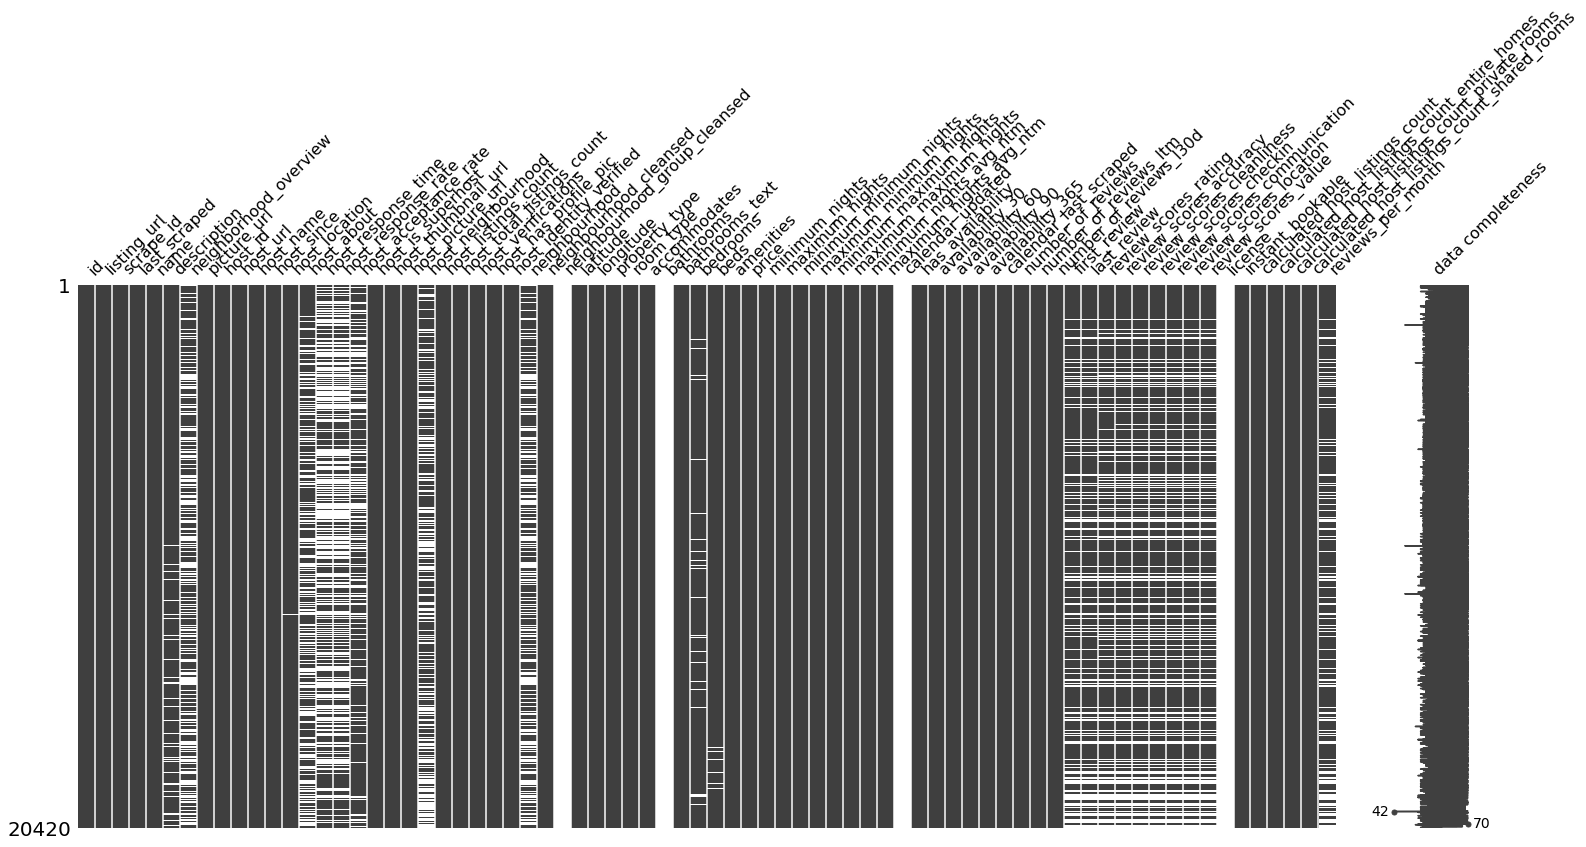

In [8]:
import missingno as msno
import numpy as np
import pandas as pd

# Missing value visualization
msno.matrix(df_listings, labels=True) 

<AxesSubplot:>

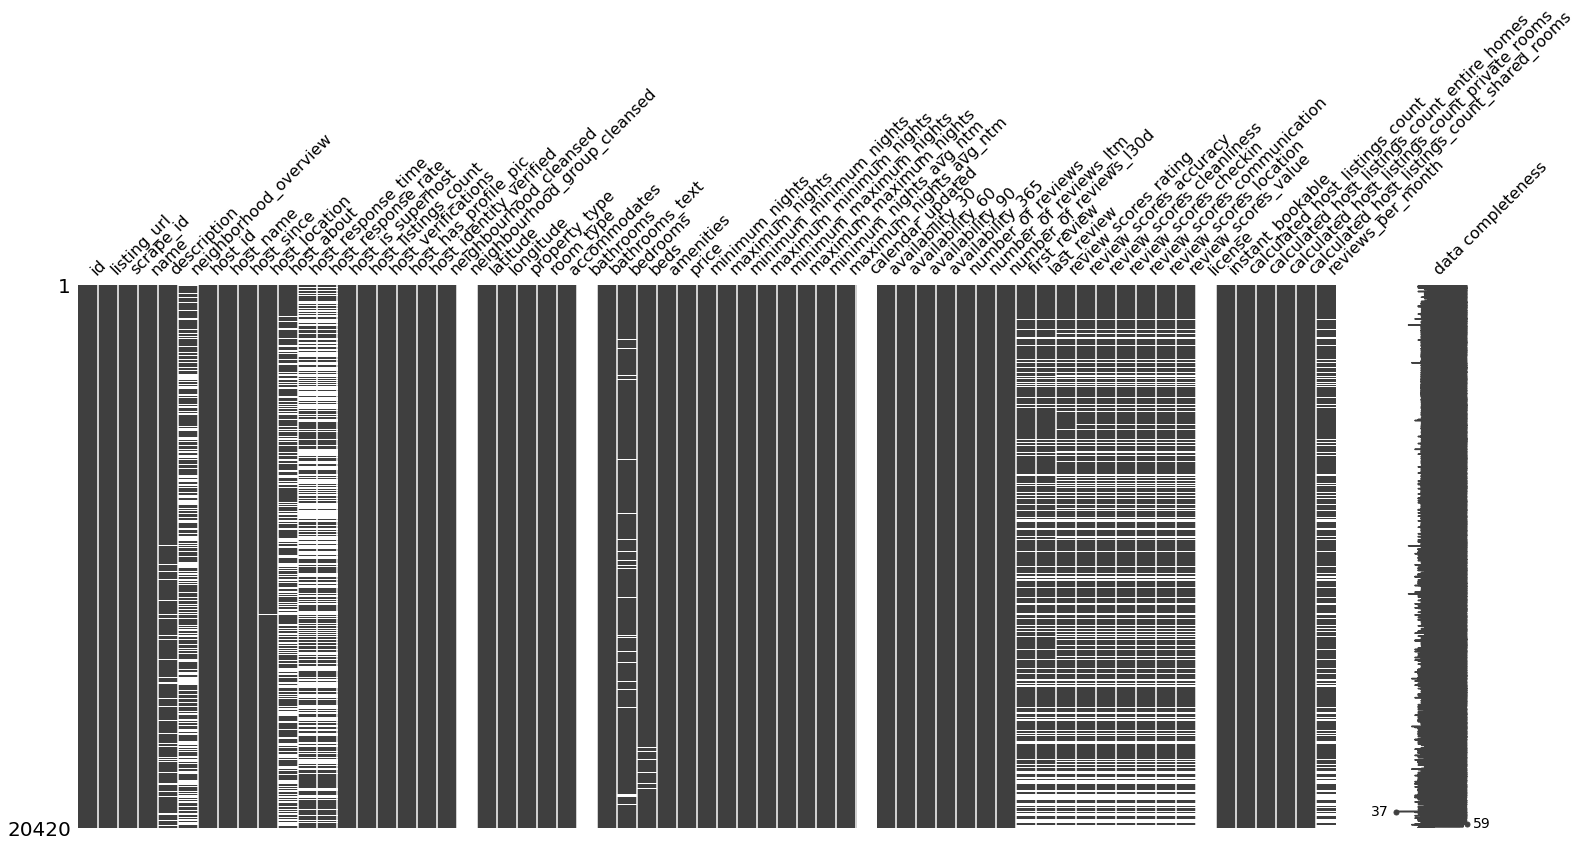

In [9]:
### according to the [1] Békés Gábor and Kézdi Gábor (2021), these columns can be useless.For me,
# delete columns contaings 'url' without missing values, I want to to some 0-1 value analysis about hosts, so these columns without missing vaules are meanlingless. 
# and some useless information, such as scrape_id, 'host_acceptance_rate'
# \because the customers cannot see the information of host_acceptance_rate\
#"host_total_listings_count",\repeat value, same as the "host_listings_count"\
# we use neighbourhood_cleansed to represent the location of home's neighbourhood,they're value after supplement \"host_neighbourhood" have too many missing values\

drops = [
    "last_scraped",
    "calendar_last_scraped", 
    "host_acceptance_rate",  
    "host_total_listings_count",
    "host_neighbourhood",
    "neighbourhood",
    "picture_url",
    "host_url",
    "host_thumbnail_url",
    "host_picture_url", 
    "has_availability"
]
df_listings_drop0=df_listings.drop(columns=drops)
msno.matrix(df_listings_drop0, labels=True) 


<AxesSubplot:>

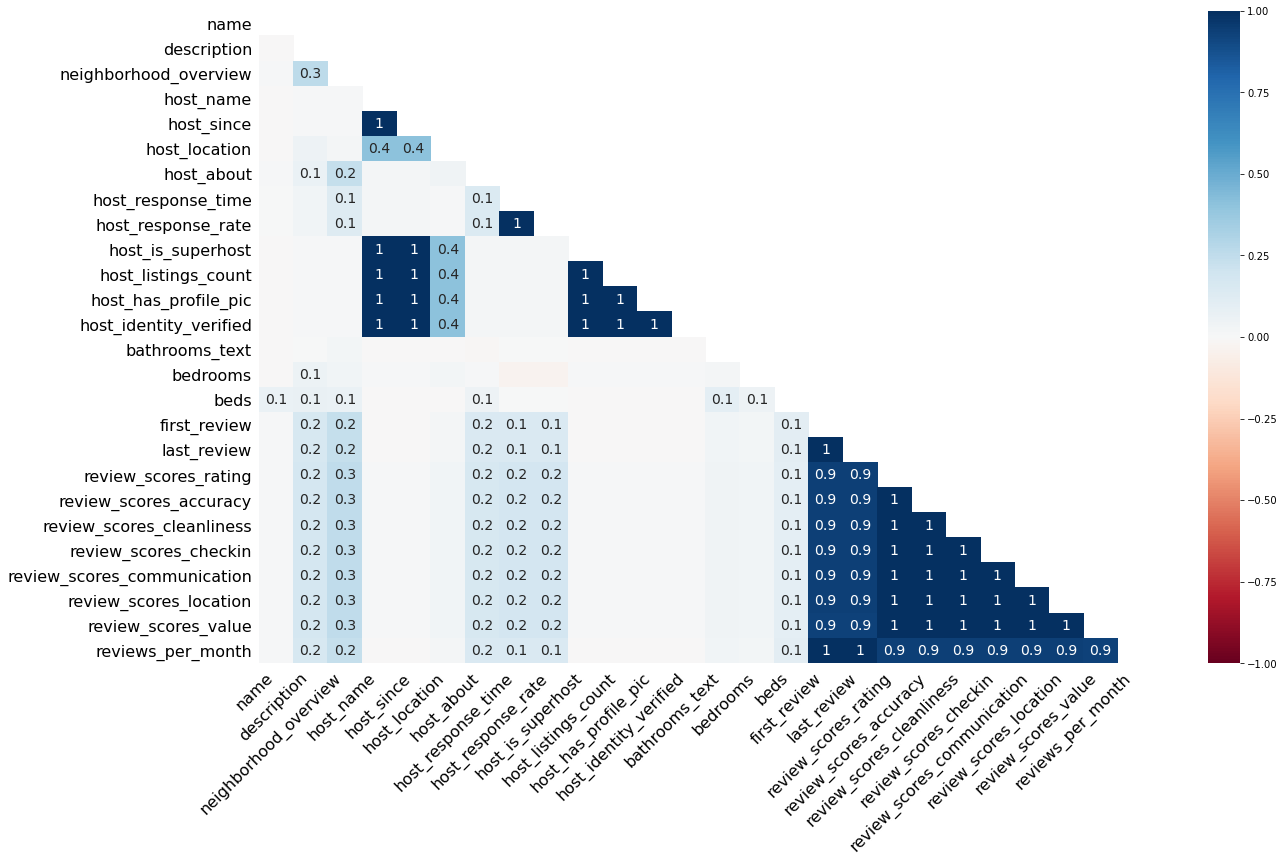

In [10]:
#热图用于确定不同列之间的零度相关性。换言之，它可以用来标识每一列之间是否存在空值关系。

#接近正1的值表示一列中存在空值与另一列中存在空值相关。接近负1的值表示一列中存在空值与另一列中存在空值是反相关的。
#换句话说，当一列中存在空值时，另一列中存在数据值，反之亦然。接近0的值表示一列中的空值与另一列中的空值之间几乎没有关系。
#有许多值显示为<-1。这表明相关性非常接近100%负。
#原文链接：https://blog.csdn.net/weixin_38037405/article/details/117856027

# Missing value heat map     
msno.heatmap(df_listings_drop0)  
#delete all rows containing missing value
#from 'first review' to 'reviews_per_month', and 'host_location', these indicators are critical for analysing the profits of different hosts
#so We cannot analyse data without these coulmns, so for these columns, we must delete all rows containing missing values
# for some indicators about hosts, it's reasonable for us to just keep these missing value, because we need to do some customers' behavior analysis,
#which will relate to whether host put their important imformation on the website.

<AxesSubplot:>

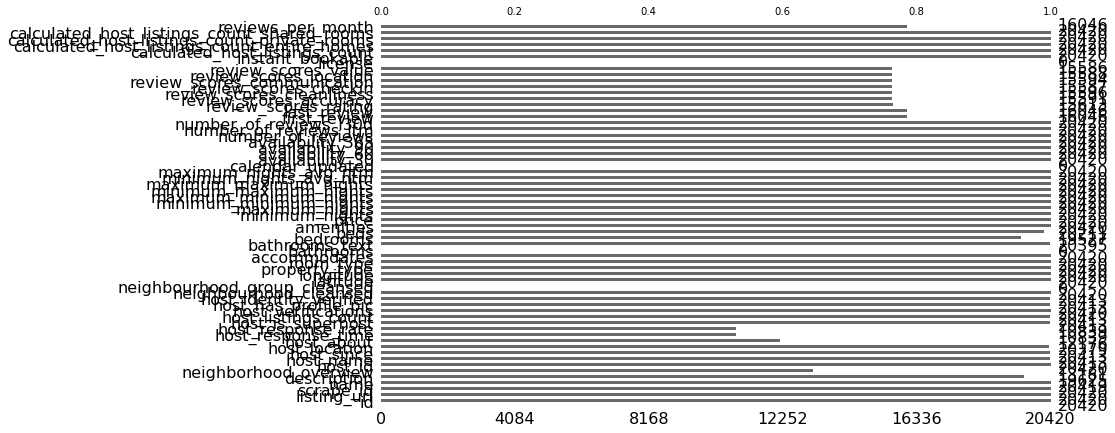

In [11]:
# bar chart
msno.bar(df_listings_drop0.sample(df_listings_drop0.shape[0]), figsize=(12, 7), )

<AxesSubplot:>

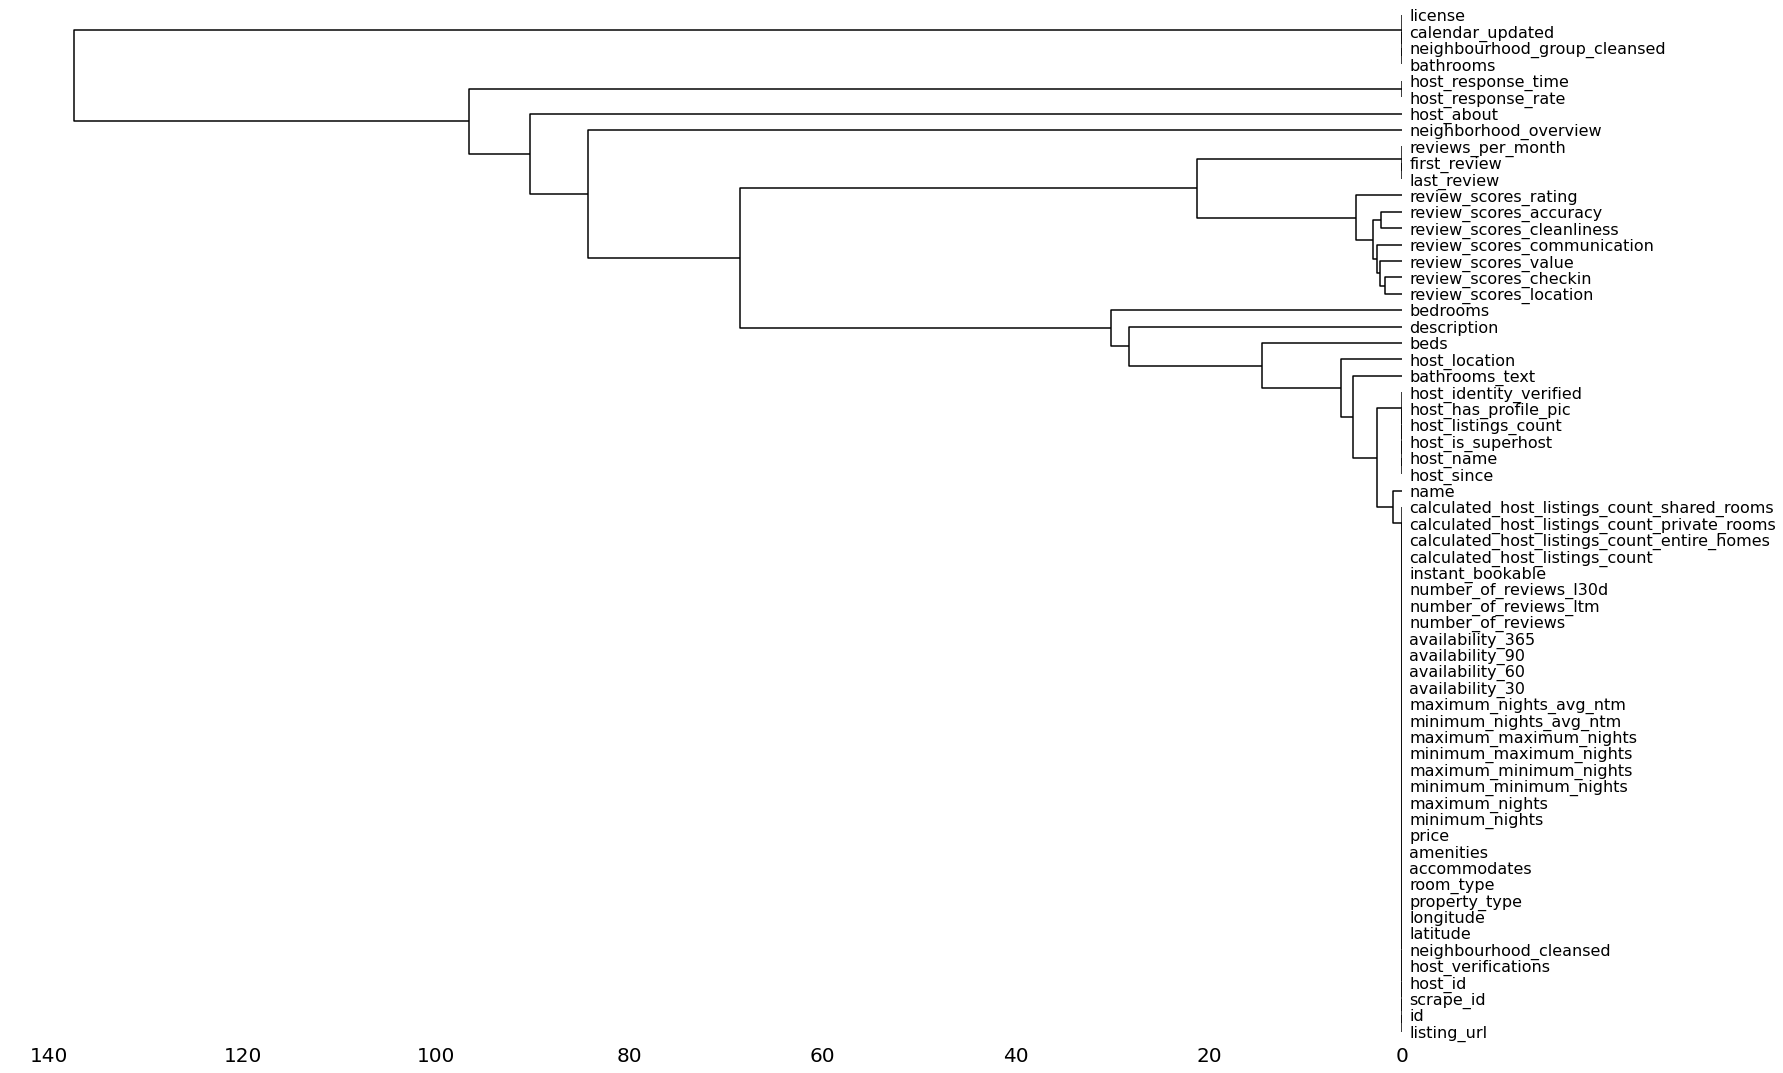

In [12]:
#missing value tree diagram
#通过树状图，可以更全面地观察缺失变量的关联性，揭示比关联热力图更深刻的相关关系：

msno.dendrogram(df_listings_drop0)

<AxesSubplot:>

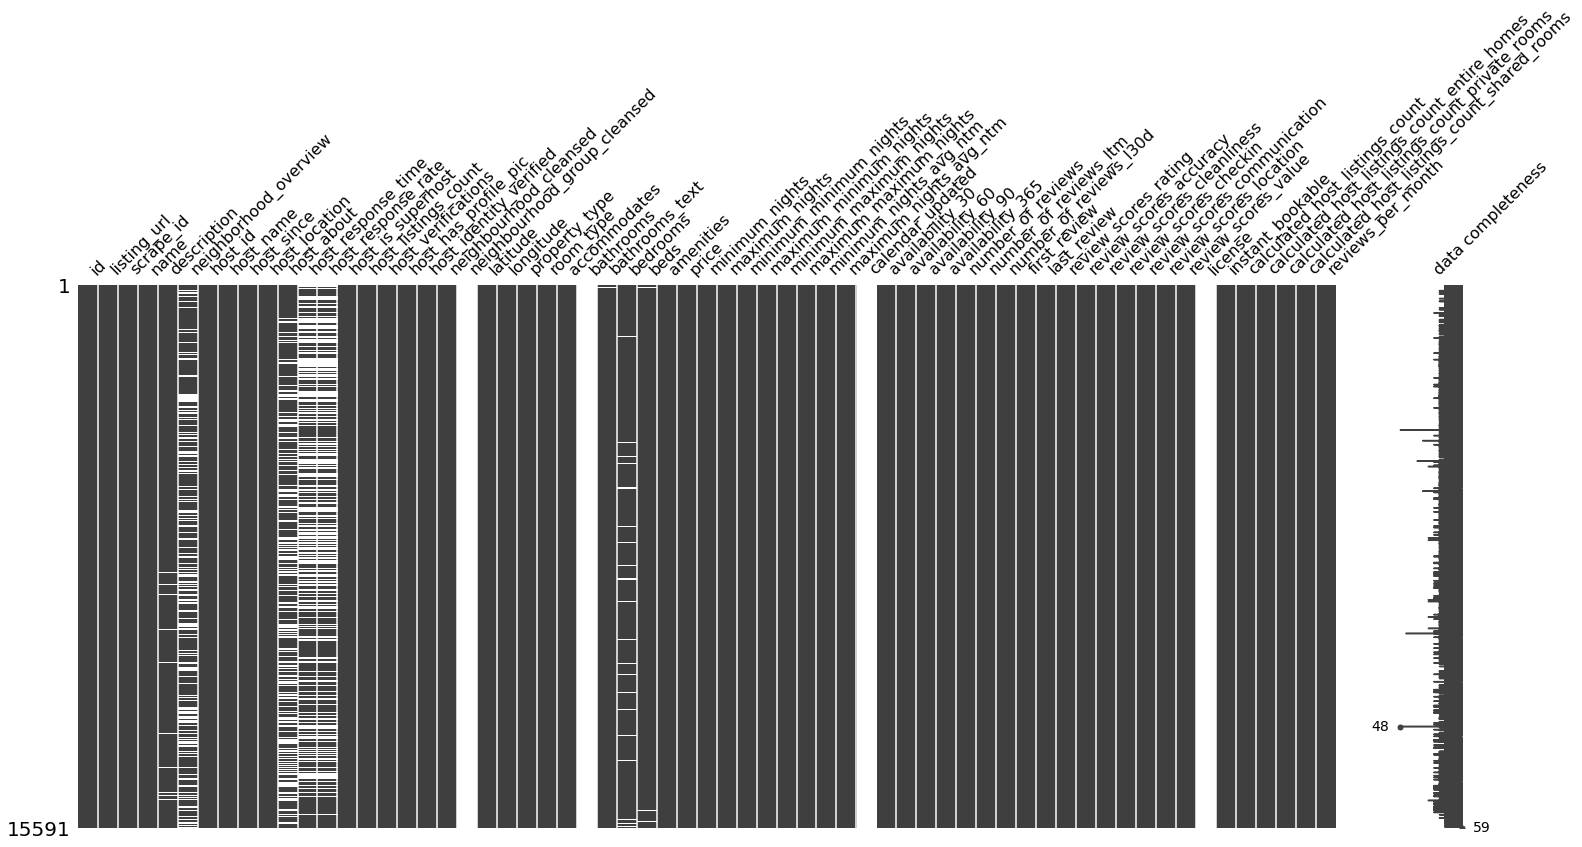

In [13]:
# the columns of 'reviews_per_month','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','host_location' is vital variables when we conduct analysis,
#so the missing value can be problem,so just delete the rows that contain missing values of these columns 
df_listings_drop1 = df_listings_drop0.dropna(subset=['reviews_per_month','review_scores_rating','review_scores_accuracy'])
msno.matrix(df_listings_drop1, labels=True) 

<AxesSubplot:>

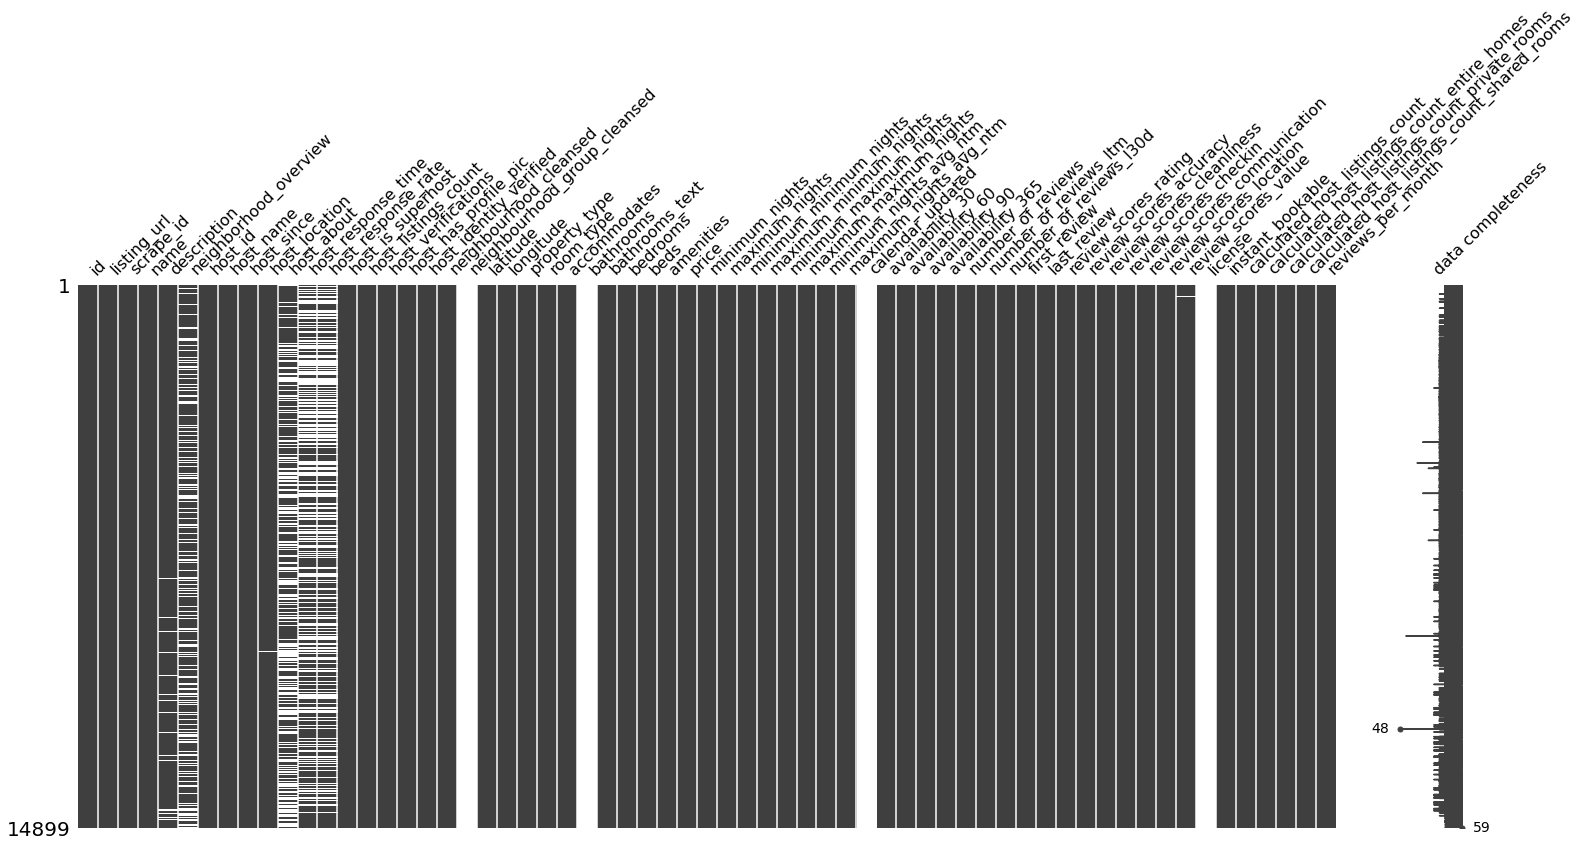

In [14]:
#delete the rows that contain missing values of amenities 
df_listings_drop2 = df_listings_drop1.dropna(subset=['bathrooms_text','bedrooms','beds'])
msno.matrix(df_listings_drop2, labels=True) 

<AxesSubplot:>

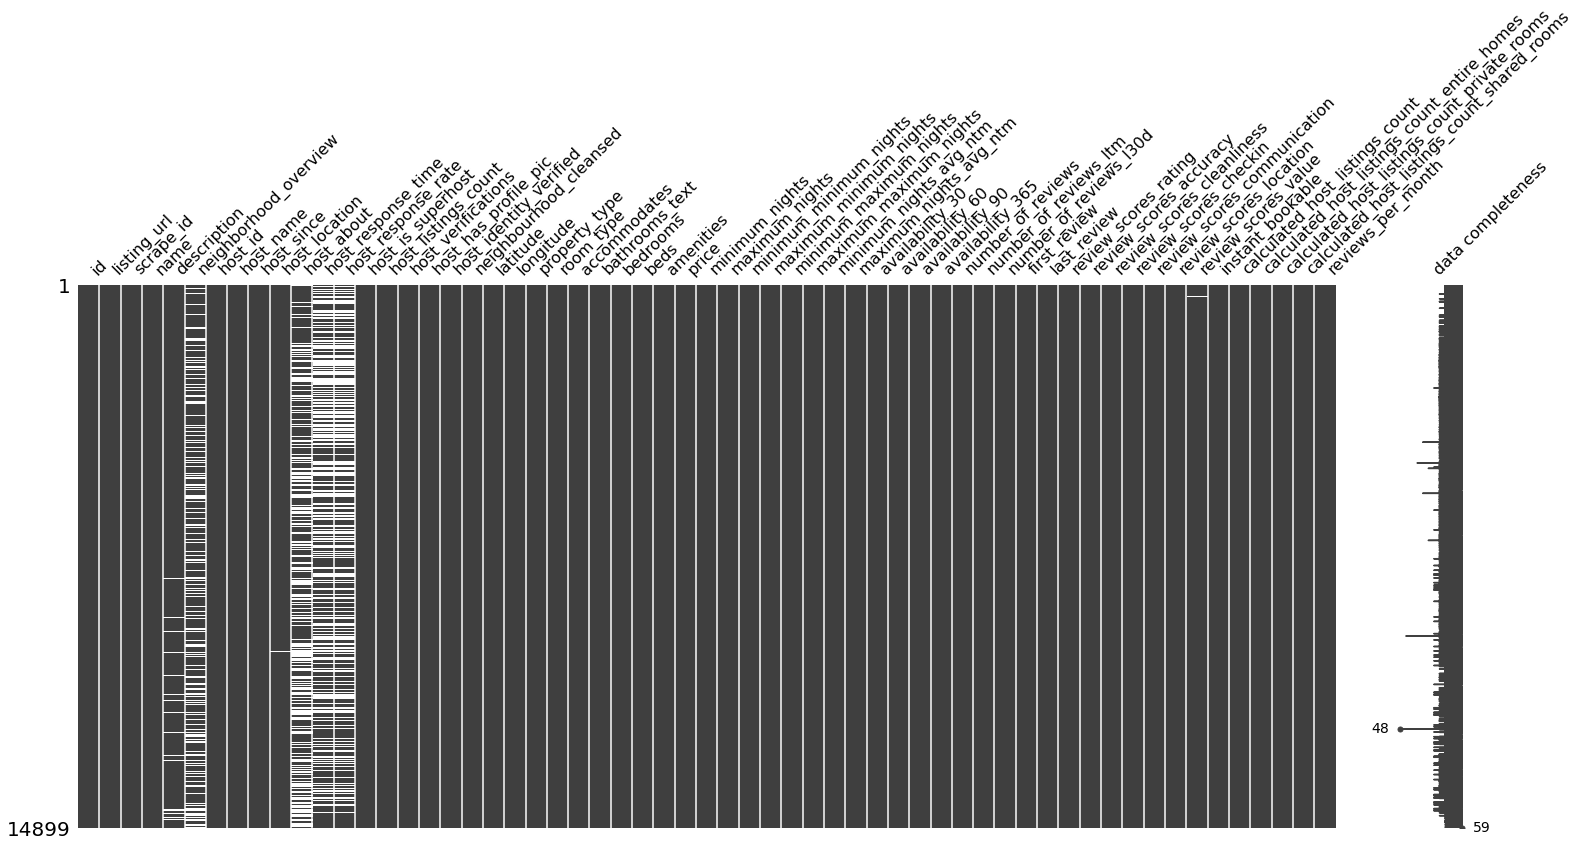

In [15]:
#delete the column containing only missing values
df_listings_drop3=df_listings_drop2.dropna(axis=1,how='all')
msno.matrix(df_listings_drop3, labels=True) 

<AxesSubplot:>

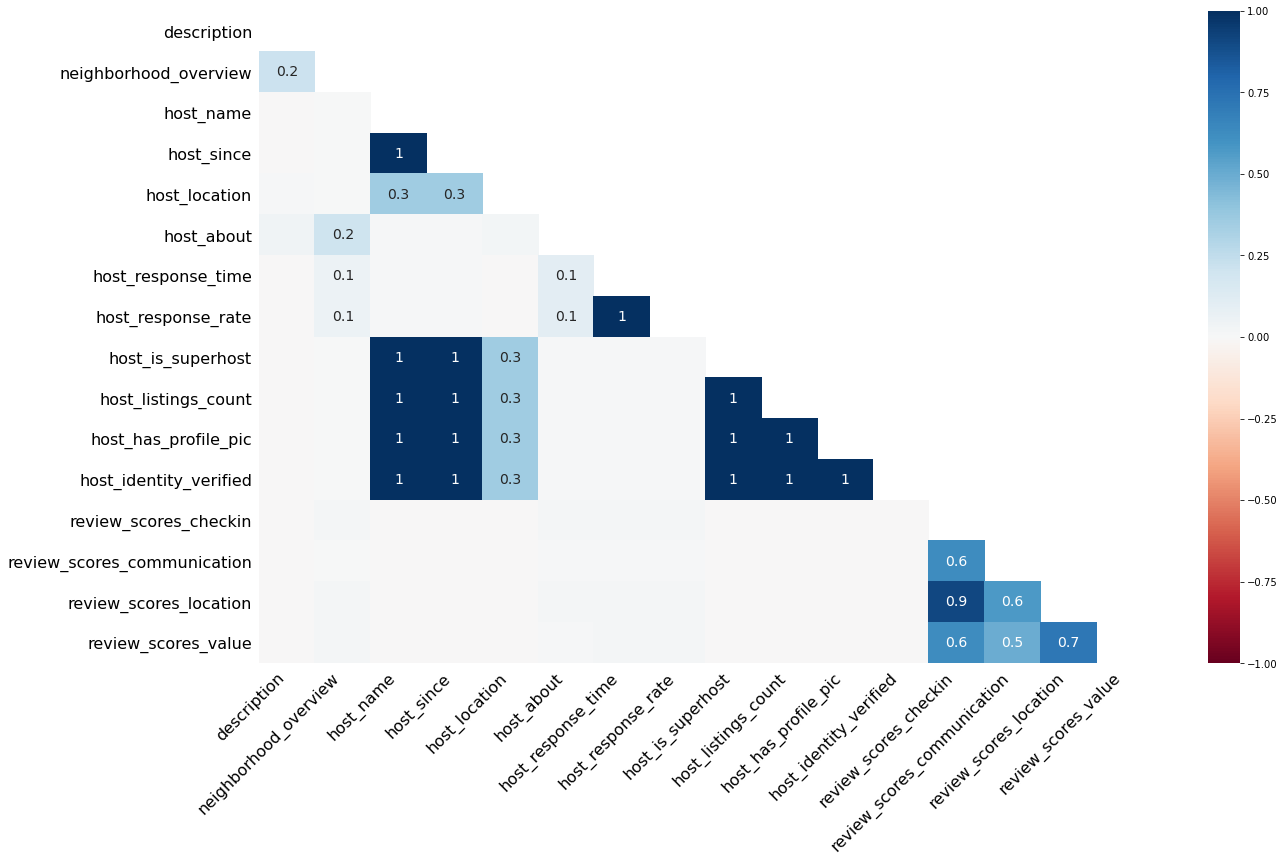

In [16]:
# hosts missing values heatmap after deleting some useless columns and rows 
msno.heatmap(df_listings_drop3) 

In [17]:
# transfer to '0-1' value : description, neighborhood_overview, host_about, host_response_time/host_response_rate【需要补齐】, 


In [18]:
#check number of missing values in every column
df_listings_drop3.isnull().sum()
print(df_listings_drop3.isnull().sum())

id                                                 0
listing_url                                        0
scrape_id                                          0
name                                               0
description                                      285
neighborhood_overview                           4216
host_id                                            0
host_name                                          2
host_since                                         2
host_location                                     16
host_about                                      5317
host_response_time                              6304
host_response_rate                              6304
host_is_superhost                                  2
host_listings_count                                2
host_verifications                                 0
host_has_profile_pic                               2
host_identity_verified                             2
neighbourhood_cleansed                        

<AxesSubplot:>

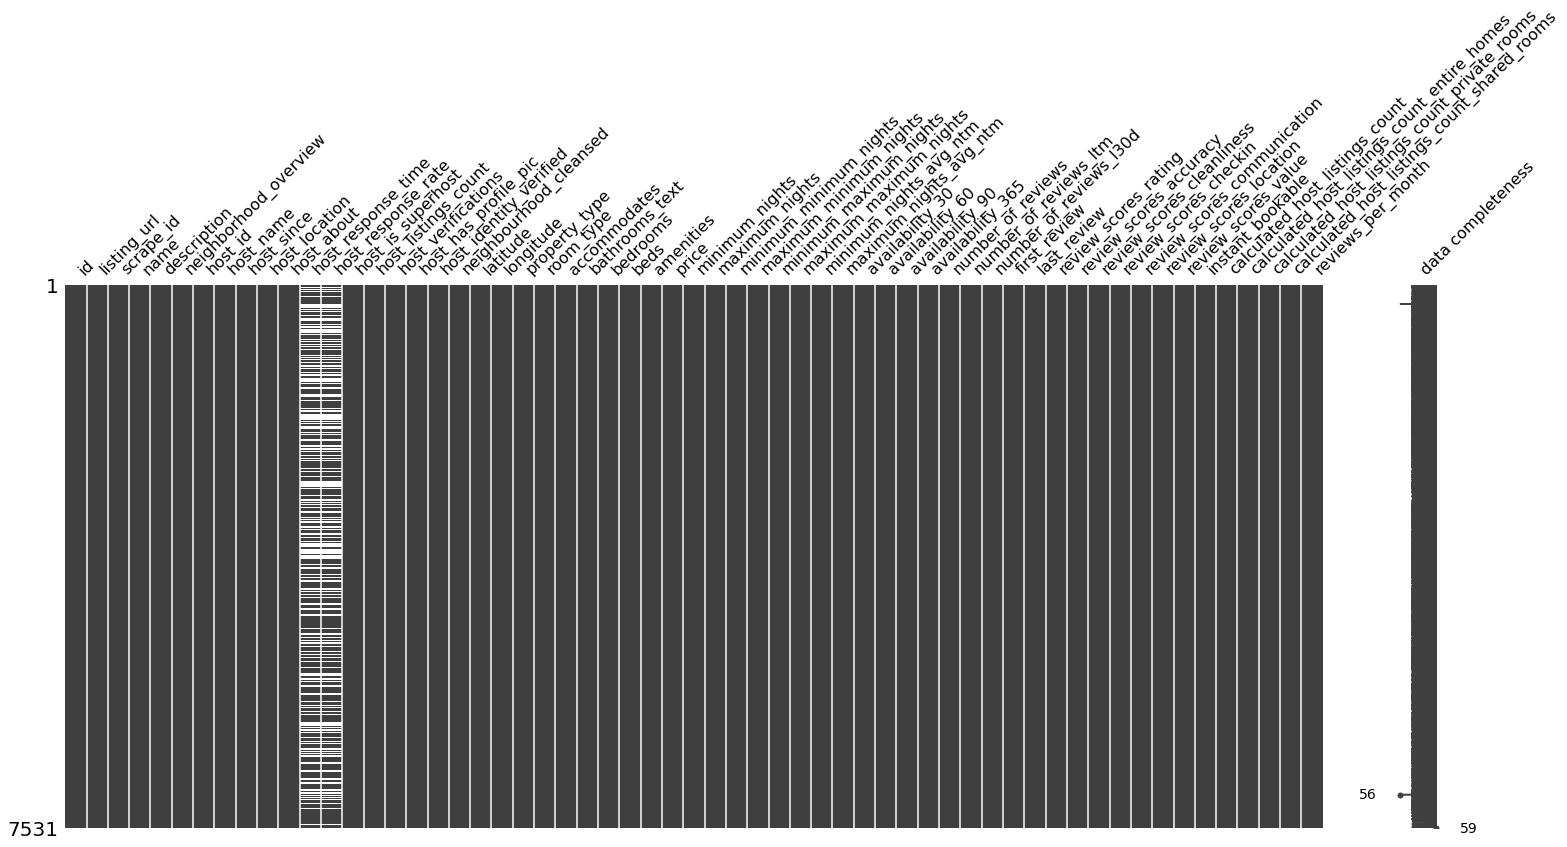

In [19]:

df_listings_drop4 = df_listings_drop3.dropna(subset=['description','neighborhood_overview','host_about'])
msno.matrix(df_listings_drop4, labels=True) 

<AxesSubplot:>

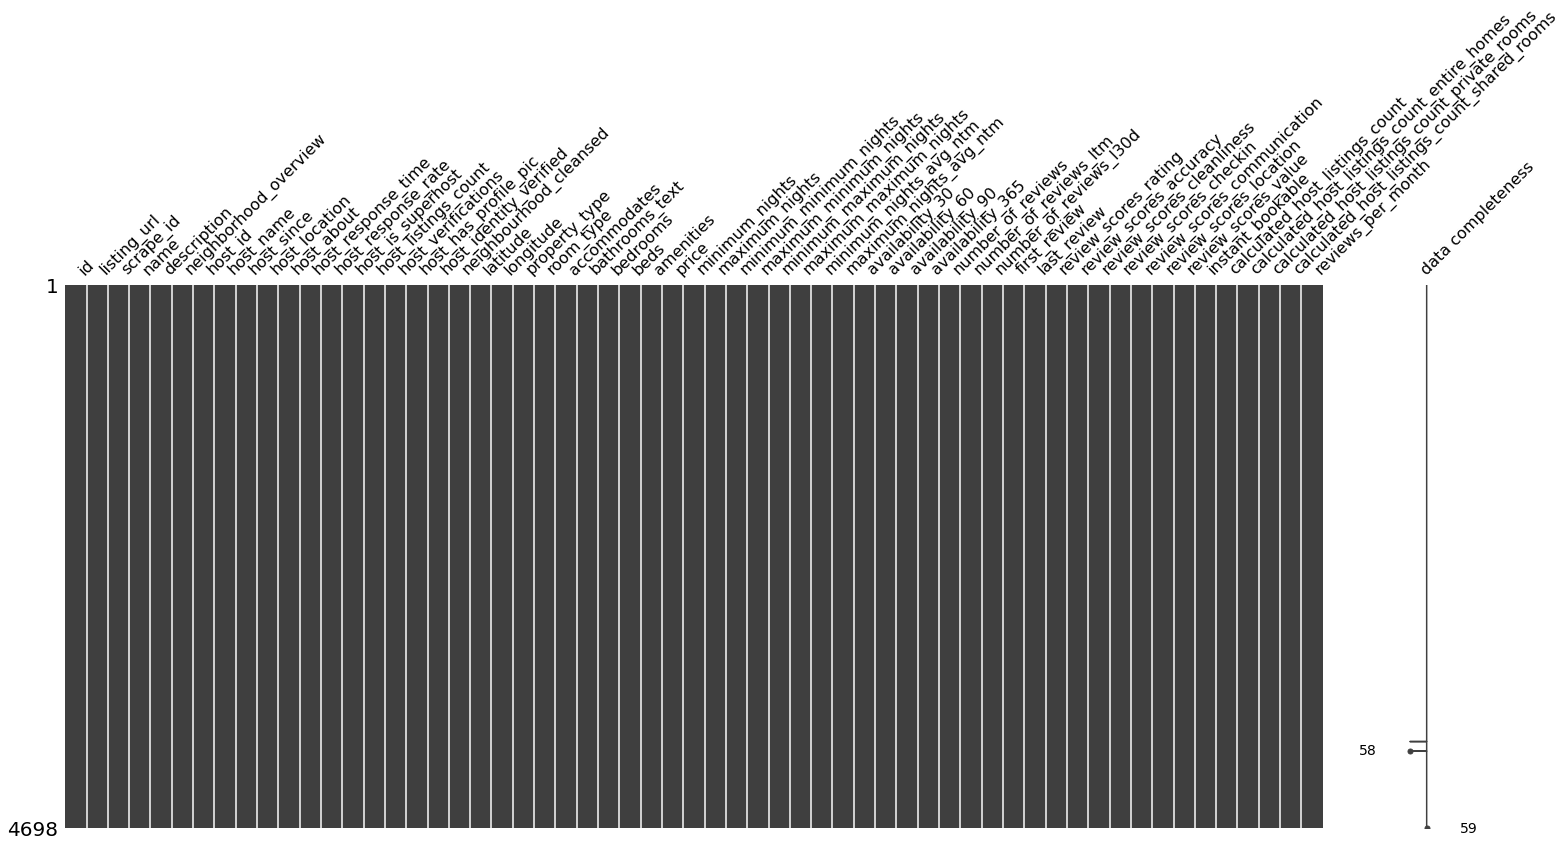

In [20]:
# Replace column missing values with 0 and others with 1
df_listings_drop5 = df_listings_drop4.dropna(subset=['host_response_time','host_response_rate'])
msno.matrix(df_listings_drop5, labels=True) 

In [21]:
df_listings_drop5['price']

1         $31.00
3         $99.00
5         $99.00
6         $79.00
8        $249.00
          ...   
20166    $105.00
20200    $170.00
20224    $111.00
20245     $95.00
20256     $20.00
Name: price, Length: 4698, dtype: object

In [22]:
df_listings_drop5.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
name                                             object
description                                      object
neighborhood_overview                            object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_is_superhost                                object
host_listings_count                             float64
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                          

In [23]:
# remove '$' of 'price'
def format_price(price):
    return(float(price.replace('$','').replace(',','')))

df_listings_drop5['price_$'] = df_listings_drop5['price'].apply(format_price) 
df_listings_drop5[['price','price_$']].head()

<ipython-input-23-9264ed109ca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_drop5['price_$'] = df_listings_drop5['price'].apply(format_price)


,price,price_$
1,$31.00,31.0
3,$99.00,99.0
5,$99.00,99.0
6,$79.00,79.0
8,$249.00,249.0


In [24]:
# (homes' names of 100 highest profit_per_month)
df_listings_drop5['profit_per_month'] = df_listings_drop5['price_$'] * df_listings_drop5['reviews_per_month']
df_listings_drop5 = df_listings_drop5.sort_values(by=['profit_per_month'],ascending=False)
df_listings_drop5[['name','host_name','price_$','number_of_reviews','reviews_per_month','profit_per_month']].head(100)

<ipython-input-24-c1a6c568dfbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_drop5['profit_per_month'] = df_listings_drop5['price_$'] * df_listings_drop5['reviews_per_month']


,name,host_name,price_$,number_of_reviews,reviews_per_month,profit_per_month
6406,Cosy Apt with luxury Tempur bed on Lygon St,Nick,7500.0,114,3.32,24900.00
11054,Be on Cloud9 - Melb Central Lux 3BR Apt,Akbar,2290.0,39,1.78,4076.20
7324,Monash University,Vickey,3228.0,32,0.94,3034.32
17491,1 Bedroom Apt - Next to The Glen Mall,Billy @ Domi Serviced Apartments,129.0,195,23.49,3030.21
17730,2 Bedroom 2 Bathroom - Next to The Glen Mall,Billy @ Domi Serviced Apartments,159.0,107,15.07,2396.13
...,...,...,...,...,...,...
13185,Studio 1158,Jim,153.0,96,6.15,940.95
5911,"Iconic ""Moonya"" - Grand Art Deco Lake Estate",Saffron,450.0,70,2.08,936.00
2288,Fantastic city location overlooking river 1,Bronnie And Neil,278.0,197,3.35,931.30
11220,"Yarra Valley - Tom's, 4 bed home. - Healesville",Andrew,436.0,43,2.13,928.68


In [25]:
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df_listings_drop5['host_location'].value_counts().head(1000)
#发现Melbourne, Victoria, Australia 的房源最多

Melbourne, Victoria, Australia                                                                                                                                      1800
Victoria, Australia                                                                                                                                                  718
AU                                                                                                                                                                   292
Australia                                                                                                                                                            112
Healesville, Victoria, Australia                                                                                                                                      46
Southbank, Victoria, Australia                                                                                                                             

In [26]:
!pip install folium
from folium.plugins import FastMarkerCluster

In [27]:
# draw maps
lats2018 = df_listings_drop5['latitude'].tolist()
lons2018 = df_listings_drop5['longitude'].tolist()
locations = list(zip(lats2018, lons2018))
import folium as fo
map1 = fo.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

df=df_listings_drop5

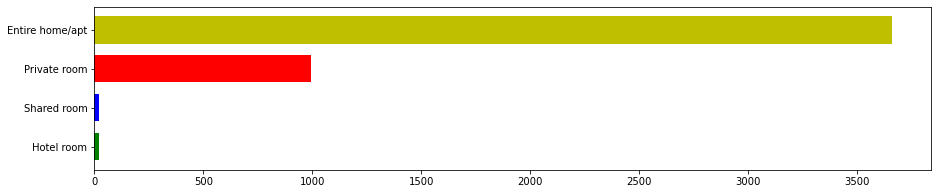

<ipython-input-28-ccfa05f82b40>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)


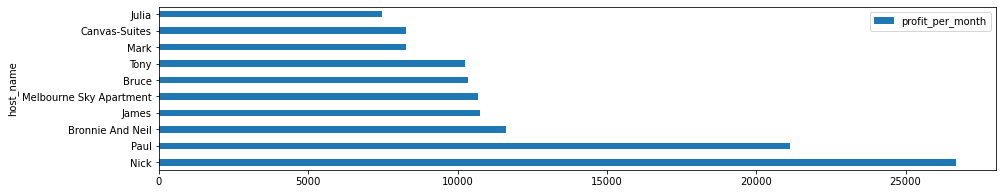

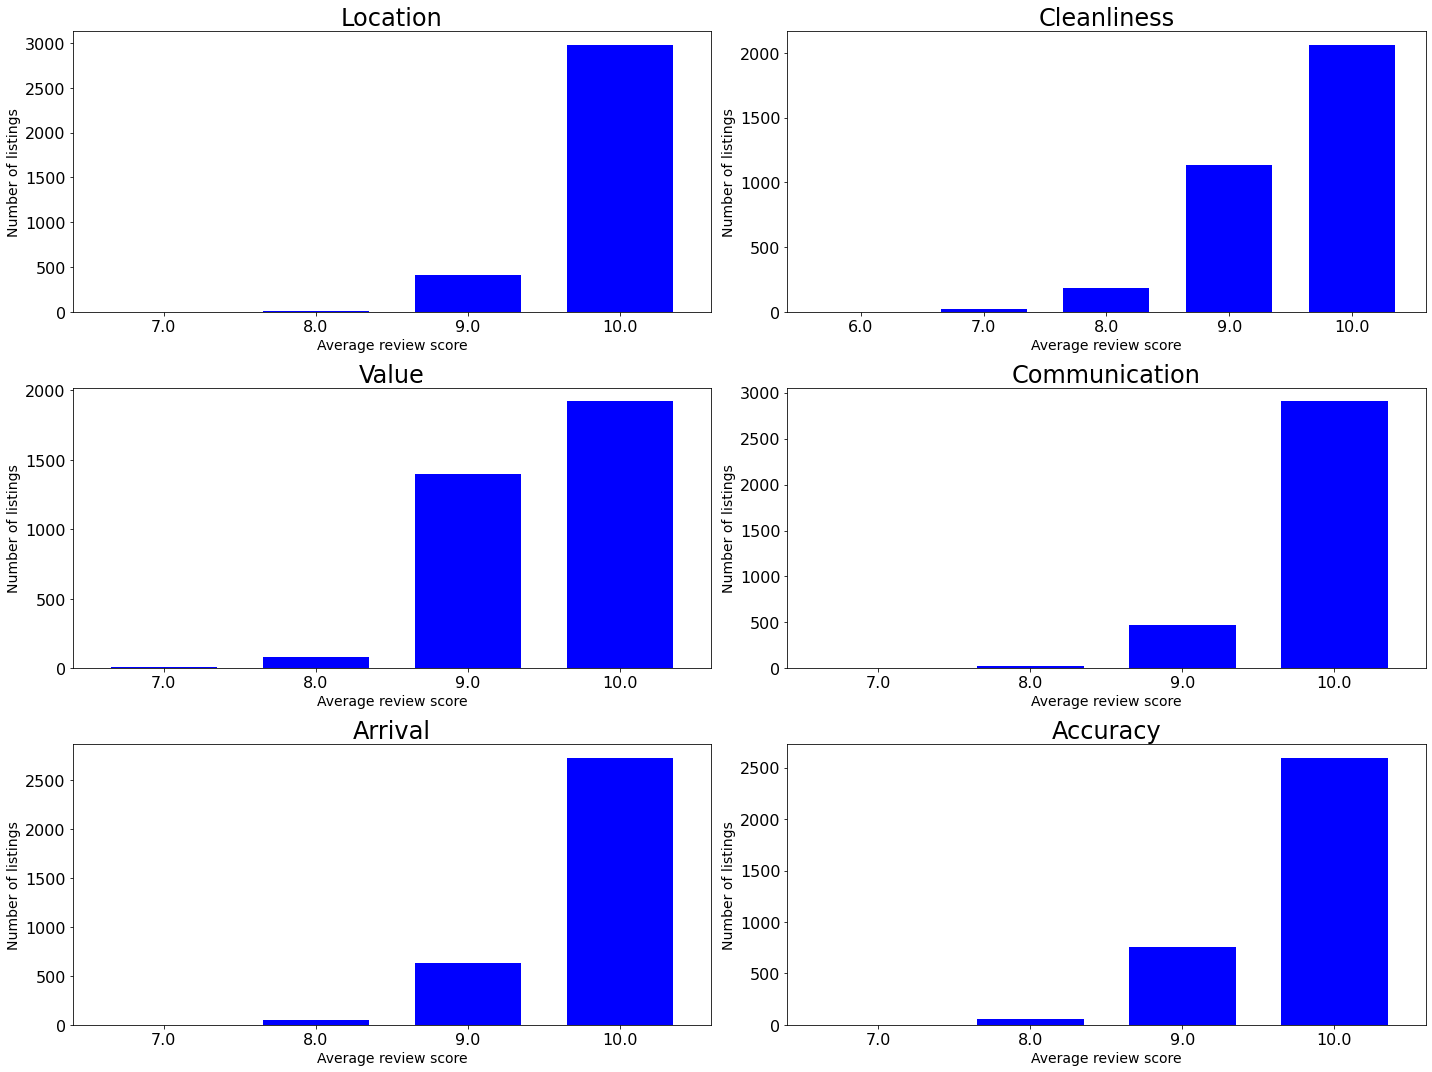

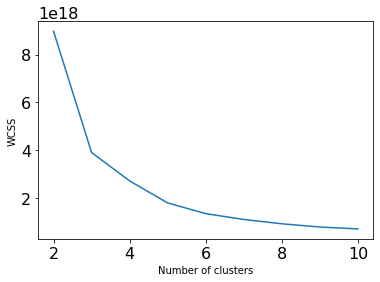

[0 0 3 ... 2 3 0]


In [28]:
# ------------ 分析 ------------
#
# -*- coding: utf-8 -*- 
# @Time : 2022/12/17 12:08 
# @Author : YeMeng 
# @File : demo2.py 
# @contact: 876720687@qq.com
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from config import *


freq = df['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=0.7, color = ["g","b","r","y"])
plt.show()

# top host
rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

# review 一系列都是得分能够直接获得消费者对这家店的评价
review_score = df[df['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=review_score['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=0.7, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=review_score['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=review_score['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=review_score['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=review_score['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=review_score['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()


# ----- find the most hot one ---------


# nlp
# ['neighborhood_overview','host_about','host_verifications']



# ----- 聚类 --------
features1 = df.select_dtypes(exclude='object')
# 确定聚类数量
wcss = []

# Fit the model for a range of values for the number of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features1)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# 依据确定值进行类别选取
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred=kmeans.fit_predict(features1)
print(y_pred)

# 聚类结果
cat_df_km=df.copy()
cat_df_km['km_result']=y_pred

In [29]:
cat_df_km['km_result'].value_counts()

0    2028
3    1060
2     596
4     415
1     350
5     249
Name: km_result, dtype: int64

In [30]:
cat_df_km[cat_df_km['km_result']==1]

,id,listing_url,scrape_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_$,profit_per_month,km_result
10390,27493207,https://www.airbnb.com/rooms/27493207,20200820034003,Yarramunda Bed & Breakfast: Angus House,"Angus House is a private, spacious and modern ...",The scenic Yarra Valley is home to world class...,207219509,Fiona,2018-08-03,"Melbourne, Victoria, Australia",Farmer,within an hour,100%,t,3.0,"['email', 'phone', 'offline_government_id', 's...",t,t,Yarra Ranges,-37.69840,145.44074,Entire house,Entire home/apt,4,2 baths,2.0,2.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...",$408.00,1,50,1,4,1125,1125,1.2,1125.0,6,28,58,317,122,48,0,2018-08-25,2020-07-07,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3,3,0,0,5.03,408.0,2052.24,1
10396,27497868,https://www.airbnb.com/rooms/27497868,20200820034003,Yarramunda Bed & Breakfast: Wagyu House,Wagyu House is a private and spacious one-bedr...,The scenic Yarra Valley is home to world class...,207219509,Fiona,2018-08-03,"Melbourne, Victoria, Australia",Farmer,within an hour,100%,t,3.0,"['email', 'phone', 'offline_government_id', 's...",t,t,Yarra Ranges,-37.69787,145.44011,Entire house,Entire home/apt,2,1 bath,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...",$319.00,1,50,1,4,1125,1125,1.5,1125.0,29,54,79,336,136,60,1,2018-08-19,2020-08-03,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,3,3,0,0,5.56,319.0,1773.64,1
10500,27797667,https://www.airbnb.com/rooms/27797667,20200820034003,Highest Building inCBD#TopView@Lvl 75#Free1Car...,New Modern Apartment with stunning views from ...,- Within Free Tram Zone<br />- Victoria Market...,207778250,Stay Casa - Antony,2018-08-06,"Melbourne, Victoria, Australia",We’re proud to provide you with a range of qua...,within an hour,100%,f,12.0,"['email', 'phone', 'offline_government_id', 'g...",t,t,Melbourne,-37.80715,144.95934,Entire apartment,Entire home/apt,10,2 baths,3.0,5.0,"[""Stove"", ""TV"", ""Free parking on premises"", ""G...",$339.00,1,1125,1,4,1125,1125,1.2,1125.0,30,60,90,193,121,45,0,2018-08-25,2020-06-30,96.0,10.0,10.0,9.0,10.0,10.0,9.0,t,9,9,0,0,4.99,339.0,1691.61,1
10897,28873160,https://www.airbnb.com/rooms/28873160,20200820034003,Japandi Inspired Family Sanctuary near Queen V...,Relax in this spacious & well-lit Japanese-Sca...,"The apartment is in Central Melbourne, a minut...",217684915,Ikigai,2018-09-28,"Melbourne, Victoria, Australia","Third culture kid that grew up in Asia, Austra...",within an hour,100%,t,2.0,"['email', 'phone', 'offline_government_id', 's...",t,t,Melbourne,-37.80806,144.96080,Entire apartment,Entire home/apt,6,2 baths,3.0,3.0,"[""Coffee maker"", ""TV"", ""Crib"", ""Full kitchen"",...",$295.00,2,31,2,4,31,31,2.1,31.0,0,0,0,0,120,49,0,2018-11-15,2020-06-12,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2,2,0,0,5.58,295.0,1646.10,1
10394,27497380,https://www.airbnb.com/rooms/27497380,20200820034003,Yarramunda Bed & Breakfast: Hereford House,Hereford House is a private and spacious one-b...,The scenic Yarra Valley is home to world cla

In [31]:
df.head()

,id,listing_url,scrape_id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_$,profit_per_month
6406,19751625,https://www.airbnb.com/rooms/19751625,20200820034003,Cosy Apt with luxury Tempur bed on Lygon St,This charming apartment located on Lygon St in...,"Located on Lygon St in Carlton, you are 400m a...",13801169,Nick,2014-04-02,"Carlton, Victoria, Australia",I promise I won't be your stereotypical vegeta...,within an hour,100%,t,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Melbourne,-37.79345,144.96682,Private room in apartment,Private room,2,1.5 shared baths,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...","$7,500.00",2,90,2,4,90,90,2.1,90.0,30,60,90,91,114,22,0,2017-10-27,2020-02-05,97.0,10.0,9.0,10.0,10.0,10.0,10.0,f,3,0,3,0,3.32,7500.0,24900.00
11054,29228505,https://www.airbnb.com/rooms/29228505,20200820034003,Be on Cloud9 - Melb Central Lux 3BR Apt,Cloud 9 living in Melbourne Central with breat...,Everything is nearby. Supermarkets (Asian & Lo...,4924814,Akbar,2013-02-01,"Victoria, Australia",Melbourne has been a home for me for more then...,within an hour,100%,f,7.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Melbourne,-37.80877,144.95935,Entire apartment,Entire home/apt,8,2 baths,3.0,4.0,"[""Stove"", ""TV"", ""Single level home"", ""Gym"", ""A...","$2,290.00",6,1125,6,600,1125,1125,587.7,1125.0,30,60,90,90,39,16,0,2018-11-04,2020-03-17,96.0,10.0,10.0,9.0,10.0,10.0,10.0,f,6,6,0,0,1.78,2290.0,4076.20
7324,21516657,https://www.airbnb.com/rooms/21516657,20200820034003,Monash University,"Close to Monash Uni<br /><br />Desk, chair are...",Available free street parking before 9am and a...,52745704,Vickey,2015-12-30,"Clayton, Victoria, Australia",Please be noted that we have left Australia,a few days or more,0%,f,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Monash,-37.92045,145.12757,Private room in house,Private room,1,1 shared bath,1.0,1.0,"[""Hangers"", ""Essentials"", ""Washer"", ""Free park...","$3,228.00",1,1125,1,4,1125,1125,1.2,1125.0,30,60,90,90,32,0,0,2017-11-09,2019-05-25,89.0,9.0,9.0,10.0,9.0,10.0,9.0,f,1,0,1,0,0.94,3228.0,3034.32
17491,40828457,https://www.airbnb.com/rooms/40828457,20200820034003,1 Bedroom Apt - Next to The Glen Mall,RECENTLY OPENED - SPECIAL RATES - 1 minute fro...,Our apartments are situated in the suburb of G...,314668017,Billy @ Domi Serviced Apartments,2019-12-05,"Glen Waverley, Victoria, Australia",Hi my name is Billy and we cannot wait to welc...,within an hour,100%,t,4.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,Monash,-37.87922,145.16482,Entire serviced apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Building staf...",$129.00,1,1125,1,4,999,1125,1.2,1001.0,29,59,89,364,195,195,11,2019-12-17,2020-08-08,96.0,10.0,10.0,10.0,10.0,10.0,9.0,f,4,4,0,0,23.49,129.0,3030.21
17730,41088166,https://www.airbnb.com/rooms/41088166,20200820034003,2 Bedroom 2 Bathroom - Next to The Glen Mall,2 BEDROOM/2 BATHROOM - APAR

In [32]:
df['host_location'].value_counts().head(10)

Melbourne, Victoria, Australia         1800
Victoria, Australia                     718
AU                                      292
Australia                               112
Healesville, Victoria, Australia         46
Southbank, Victoria, Australia           44
South Yarra, Victoria, Australia         43
New South Wales, Australia               41
West Melbourne, Victoria, Australia      40
Saint Kilda, Victoria, Australia         40
Name: host_location, dtype: int64

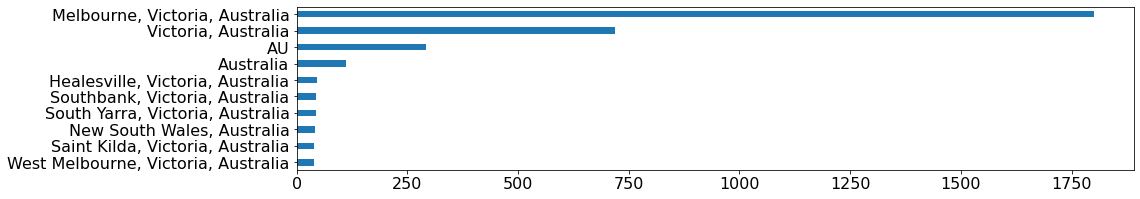

In [33]:
#top 10 hots_locations
#数据标签？？？？？
location_data = df['host_location'].value_counts().head(10)
location_data = location_data.sort_values()
rect=location_data.plot.barh(figsize=(15, 3), width=0.4)
x=location_data.index
y=location_data
plt.show()

In [34]:
print(location_data.index)

Index(['West Melbourne, Victoria, Australia',
       'Saint Kilda, Victoria, Australia', 'New South Wales, Australia',
       'South Yarra, Victoria, Australia', 'Southbank, Victoria, Australia',
       'Healesville, Victoria, Australia', 'Australia', 'AU',
       'Victoria, Australia', 'Melbourne, Victoria, Australia'],
      dtype='object')


In [35]:
print(location_data)

West Melbourne, Victoria, Australia      40
Saint Kilda, Victoria, Australia         40
New South Wales, Australia               41
South Yarra, Victoria, Australia         43
Southbank, Victoria, Australia           44
Healesville, Victoria, Australia         46
Australia                               112
AU                                      292
Victoria, Australia                     718
Melbourne, Victoria, Australia         1800
Name: host_location, dtype: int64


In [36]:
df['host_is_superhost']

6406     t
11054    f
7324     f
17491    t
17730    t
        ..
5775     f
5917     f
5874     f
5201     f
2599     f
Name: host_is_superhost, Length: 4698, dtype: object

In [37]:
# relace 't' to '1', and 'f' to '0' in 'host_is_superhost'column
def format_price(price):
    return(float(price.replace('t','1').replace('f','0')))

df['host_is_superhost_0/1'] = df['host_is_superhost'].apply(format_price) 
df[['host_is_superhost','host_is_superhost_0/1']].head()

,host_is_superhost,host_is_superhost_0/1
6406,t,1.0
11054,f,0.0
7324,f,0.0
17491,t,1.0
17730,t,1.0


In [38]:
# relace 't' to '1', and 'f' to '0' in the columns of 'host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable'
df['host_is_superhost'] = df['host_is_superhost'].map({'t':1,'f':0})
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t':1,'f':0})
df['host_identity_verified'] = df['host_identity_verified'].map({'t':1,'f':0})
df['instant_bookable'] = df['instant_bookable'].map({'t':1,'f':0})


In [39]:
df[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']]

,host_is_superhost,host_has_profile_pic,host_identity_verified,instant_bookable
6406,1,1,1,0
11054,0,1,1,0
7324,0,1,1,0
17491,1,1,1,0
17730,1,1,1,1
...,...,...,...,...
5775,0,1,1,1
5917,0,1,1,1
5874,0,1,1,1
5201,0,1,1,0


In [40]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
name                                             object
description                                      object
neighborhood_overview                            object
host_id                                           int64
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_is_superhost                                 int64
host_listings_count                             float64
host_verifications                               object
host_has_profile_pic                              int64
host_identity_verified                          

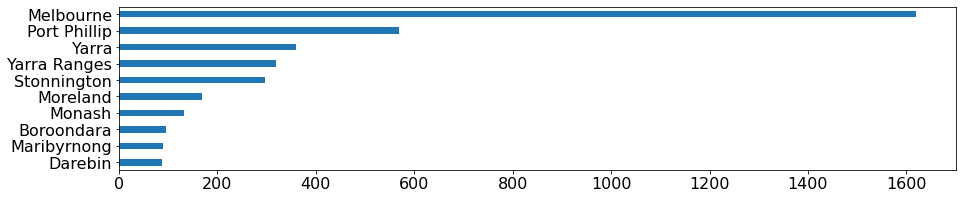

In [41]:
#top 10 neighbourhood_cleansed
#数据标签？？？？？
neighbourhood_cleansed_data = df['neighbourhood_cleansed'].value_counts().head(10)
neighbourhood_cleansed_data = neighbourhood_cleansed_data.sort_values()
neighbourhood_cleansed_data.plot.barh(figsize=(15, 3), width=0.4)
x=neighbourhood_cleansed_data.index
y=neighbourhood_cleansed_data
plt.show()

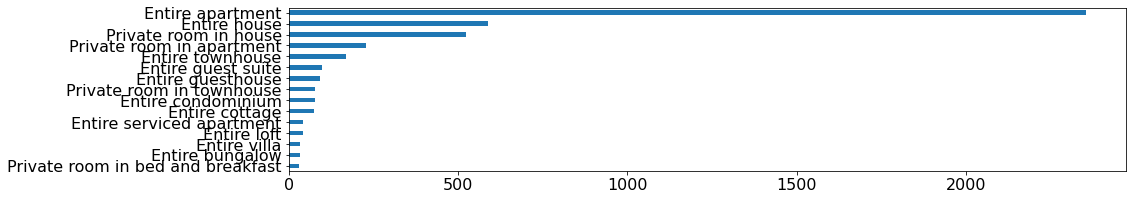

In [42]:
#top15 types of property
#数据标签？？？？？
property_type_data = df['property_type'].value_counts().head(15)
property_type_data = property_type_data.sort_values()
property_type_data.plot.barh(figsize=(15, 3), width=0.4)
x=property_type_data.index
y=property_type_data
plt.show()

In [43]:
# show top15 types of property
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df['property_type'].value_counts().head(15)

Entire apartment                     2353
Entire house                          587
Private room in house                 524
Private room in apartment             228
Entire townhouse                      170
Entire guest suite                     99
Entire guesthouse                      92
Private room in townhouse              79
Entire condominium                     78
Entire cottage                         76
Entire serviced apartment              43
Entire loft                            41
Entire villa                           33
Entire bungalow                        32
Private room in bed and breakfast      30
Name: property_type, dtype: int64

In [44]:
# show top15 types of property
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df['bathrooms_text'].value_counts()

1 bath               2383
2 baths               828
1 shared bath         407
1.5 baths             267
1 private bath        234
2.5 baths             156
1.5 shared baths      126
3 baths                70
2 shared baths         53
3.5 baths              43
2.5 shared baths       33
4 shared baths         18
4 baths                14
3 shared baths          9
0 shared baths          7
Shared half-bath        6
5 baths                 6
5.5 shared baths        6
4.5 baths               5
0 baths                 4
3.5 shared baths        4
7.5 baths               3
Half-bath               3
7 baths                 3
10 baths                2
6 baths                 2
6.5 baths               2
8 baths                 1
7 shared baths          1
Private half-bath       1
5 shared baths          1
Name: bathrooms_text, dtype: int64

In [45]:
df_reviews = pd.read_csv('reviews.csv')

In [46]:
df_reviews = df_reviews[~df_reviews['comments'].isna()]

In [47]:
#drop rows that 'listing_id' doesn't exist in the 'id' of 'listings' and create a new dataset'concat'
# merge dataset 'listings' and 'reviews' with the same 'id'
df_reviews.drop(columns=['id'],inplace=True)
df_reviews = df_reviews.rename(columns={'listing_id': 'id'})
df_concat = pd.merge(df,df_reviews,how="inner",on='id')

In [48]:
df_concat.shape

(249632, 66)

In [49]:
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

df_concat.loc[:,'sentiment'] = df_concat['comments'].apply(calculate_sentiment)
df_concat[['comments','sentiment']].head(10)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

NameError: name 'scorer' is not defined